In [227]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression

# Data loading
Load the benchmark data into a Pandas `DataFrame`

In [195]:
all_pickles = glob.glob('benchmark_results/*pickle')
print(len(all_pickles))
benchmarks = sorted(list(set(['_'.join(name.split('/')[1].split('_')[0:2]) for name in all_pickles])))
processors = sorted(list(set([name.split('/')[1].split('_')[2] for name in all_pickles])))
print('Benchmarks:', benchmarks)
print('Quantum computers:', processors)

1037
Benchmarks: ['bitcode_3qubits2rounds', 'bitcode_3qubits3rounds', 'bitcode_5qubits2rounds', 'bitcode_5qubits3rounds', 'ghz_11qubits', 'ghz_3qubits', 'ghz_7qubits', 'hamsim_11qubits1steps', 'hamsim_11qubits3steps', 'hamsim_4qubits1steps', 'hamsim_4qubits3steps', 'hamsim_7qubits1steps', 'hamsim_7qubits3steps', 'merminbell_3qubits', 'merminbell_4qubits', 'phasecode_3qubits2rounds', 'phasecode_3qubits3rounds', 'phasecode_5qubits2rounds', 'phasecode_5qubits3rounds', 'qaoafswap_11qubits', 'qaoafswap_4qubits', 'qaoafswap_7qubits', 'qaoavanilla_11qubits', 'qaoavanilla_4qubits', 'qaoavanilla_7qubits', 'vqe_4qubits1layers', 'vqe_4qubits2layers', 'vqe_7qubits1layers', 'vqe_7qubits2layers']
Quantum computers: ['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']


In [196]:
df = pd.DataFrame(data=None, index=processors, columns=benchmarks)

In [197]:
df.head()

,bitcode_3qubits2rounds,bitcode_3qubits3rounds,bitcode_5qubits2rounds,bitcode_5qubits3rounds,ghz_11qubits,ghz_3qubits,ghz_7qubits,hamsim_11qubits1steps,hamsim_11qubits3steps,hamsim_4qubits1steps,...,qaoafswap_11qubits,qaoafswap_4qubits,qaoafswap_7qubits,qaoavanilla_11qubits,qaoavanilla_4qubits,qaoavanilla_7qubits,vqe_4qubits1layers,vqe_4qubits2layers,vqe_7qubits1layers,vqe_7qubits2layers
aspen9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
casablanca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guadalupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ionq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lagos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
# Fill in the dataframe
for qc in df.index:
    for bmark in df.columns:
        pickles = glob.glob(f'benchmark_results/{bmark}_{qc}_*.pickle')
        #print(qc, bmark, len(pickles))
        if len(pickles) > 0:
            scores = []
            for pklfile in pickles:
                with open(pklfile, 'rb') as pf:
                    result = pickle.load(pf)
                    scores.append(result['score'])
            df.at[qc, bmark] = (np.mean(scores), np.std(scores))

In [199]:
df.head()

,bitcode_3qubits2rounds,bitcode_3qubits3rounds,bitcode_5qubits2rounds,bitcode_5qubits3rounds,ghz_11qubits,ghz_3qubits,ghz_7qubits,hamsim_11qubits1steps,hamsim_11qubits3steps,hamsim_4qubits1steps,...,qaoafswap_11qubits,qaoafswap_4qubits,qaoafswap_7qubits,qaoavanilla_11qubits,qaoavanilla_4qubits,qaoavanilla_7qubits,vqe_4qubits1layers,vqe_4qubits2layers,vqe_7qubits1layers,vqe_7qubits2layers
aspen9,NaN,NaN,NaN,NaN,"(0.007146134301462289, 0.008685520618664535)","(0.525872740908511, 0.09747226324408419)","(0.03068612362263978, 0.0012828094188514587)","(0.6933011548612713, 0.01608208283866709)","(0.689365124696981, 0.03632313198714244)","(0.7754966094067258, 0.040519871668108755)",...,"(0.49120134388440073, 0.011468853038697938)","(0.5364235126588255, 0.03903907068117196)","(0.5124360903051703, 0.008922439363876775)","(0.5197407197290687, 0.017101023746982913)","(0.49442913665900334, 0.017766782661698347)","(0.5212959870132441, 0.010221608615537132)",NaN,NaN,NaN,NaN
casablanca,"(0.5396363636363637, 0.11011442208182003)","(0.3894, 0.0495261547063771)",NaN,NaN,NaN,"(0.8868245540985928, 0.036708881611919535)","(0.616691029784841, 0.13306554514858351)",NaN,NaN,"(0.9351132760733925, 0.01676098313213025)",...,NaN,"(0.7945208157429539, 0.10941011680973146)","(0.505664856090417, 0.013782995455714195)",NaN,"(0.673888209954356, 0.06867074406416714)","(0.5099239509526233, 0.025561288583198588)","(0.971095170658615, 0.028014737165832044)","(0.9359877221014321, 0.015290764964819582)","(0.7850987112408645, 0.04230640179622018)","(0.6527903359485132, 0.06576430134925983)"
guadalupe,"(0.49172727272727274, 0.06458833402838303)","(0.32725, 0.11273580841950792)","(0.23461111111110972, 0.037993989128236344)","(0.10199999999999881, 0.034851271298348696)","(0.5646353797203666, 0.025493213194692582)","(0.901483743684184, 0.025024421182714054)","(0.7399409378764176, 0.029002889806360156)","(0.8993481245582409, 0.04241285358496244)","(0.8714136095454658, 0.033344233754902274)","(0.9636757760733925, 0.012367930781078758)",...,"(0.5236100713603207, 0.014337435372860596)","(0.786690502609963, 0.05365375598741059)","(0.6457856253559319, 0.03047824616754836)","(0.49396093499567284, 0.011859868178969644)","(0.8034873574406224, 0.037937529838698476)","(0.476077841422274, 0.017787082773961935)","(0.968213393810736, 0.025930584446757665)","(0.9000142693475048, 0.033967080963945545)","(0.836102716507646, 0.02031706715476111)","(0.8455867943999031, 0.0334764272364141)"
ionq,"(0.9714285714285714, 0.02857142857142858)","(0.8428571428571429, 0.014285714285714235)","(0.9714285714285714, 0.0)","(0.7142857142857143, 0.0)","(0.6723243356854028, 0.11383741695058501)","(0.9732573776576282, 0.021890890525892444)","(0.8195684704255065, 0.12503905091211515)","(0.9226370855972021, 0.0284695810345582)","(0.8024915316233879, 0.03280916938787259)","(0.9559644062711506, 0.04033198927550652)",...,"(0.5404003992788173, 0.0628503291042072)","(0.8429701540205187, 0.06868625264404044)","(0.56225220333829, 0.08157470333633832)","(0.5413857512436571, 0.08487013780618409)","(0.8163014353740232, 0.13386995153224512)","(0.5386621902445488, 0.0952967873218198)","(0.9523890570683782, 0.012170929489586672)","(0.8621536152462945, 0.0267619030056352)","(0.9411047282586855, 0.03022817117603565)","(0.8099839613362692, 0.059525198548817035)"
lagos,"(0.6642500000000001, 0.13213936771454599)","(0.62885, 0.11158137165315725)",NaN,NaN,NaN,"(0.9369344866406806, 0.03005196210798553)","(0.4964107951062547, 0.25590692160181616)",NaN,NaN,"(0.9676132760733925, 0.026950443203941726)",...,NaN,"(0.8398067292527406, 0.06010729656837978)","(0.4942022305035447, 0.016910768341947522)",NaN,"(0.587086450420666, 0.12110090992571483)","(0.5071365088115134, 0.03290414057978148)","(0.8857612400085051, 0.03957048317515163)","(0.8123869292336758, 0.07300313975712411)","(0.7248472150993681, 0.0548497644754574)","(0.6051052905365104, 0.06911741375015681)"


In [200]:
def get_names(df, benchmarks):
    names = []
    for bmark in benchmarks:
        temp_names = []
        column_df = df.loc[:, bmark]
        for qpu in column_df.index:
            if isinstance(column_df.loc[qpu], tuple):
                temp_names.append(qpu)
        if len(temp_names) > len(names):
            names = temp_names
    return names

# GHZ

['ghz_3qubits', 'ghz_7qubits', 'ghz_11qubits']
['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['3-qubits', '7-qubits', '11-qubits']


Text(0, 0.5, 'Score')

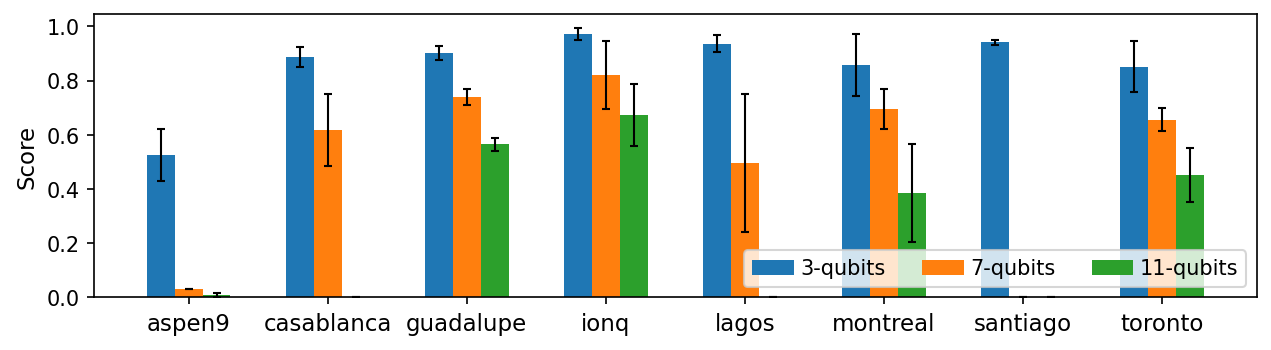

In [201]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.2

benchmarks = sorted([idx for idx in df.columns if 'ghz' in idx], key=lambda n: int(n.split('_')[1].strip('qubits')))
names = get_names(df, benchmarks)
labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width*1.5
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=3, bbox_to_anchor=(0.55, 0., 0.45, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)
#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# Mermin-Bell

['merminbell_3qubits', 'merminbell_4qubits']
['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['3-qubits', '4-qubits']
0
[-0.2  0.8  1.8  2.8  3.8  4.8  5.8  6.8]
[-0.2, 0.8, 1.8, 2.8, 3.8, 4.8, 5.8, 6.8]
1
[-0.2  0.8  1.8  2.8  3.8  4.8  5.8  6.8]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


Text(0, 0.5, 'Score')

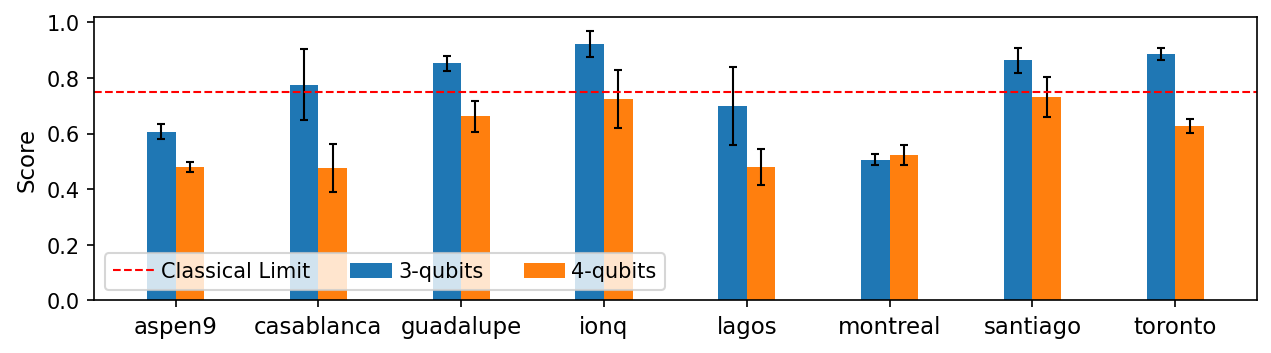

In [202]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.2

benchmarks = sorted([idx for idx in df.columns if 'mermin' in idx], key=lambda n: int(n.split('_')[1].strip('qubits')))
names = get_names(df, benchmarks)
labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width
    x = [val + width*i for val in xvals]
    print(i)
    print(xvals)
    print(x)

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.axhline(0.75, c='r', ls='--', label='Classical Limit', lw=1)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=3, bbox_to_anchor=(0.0, 0.0, 0.5, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)
#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# Hamiltonian Simulation

['hamsim_4qubits1steps', 'hamsim_4qubits3steps', 'hamsim_7qubits1steps', 'hamsim_7qubits3steps', 'hamsim_11qubits1steps', 'hamsim_11qubits3steps']
['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['4-qubits, 1-step', '4-qubits, 3-steps', '7-qubits, 1-step', '7-qubits, 3-steps', '11-qubits, 1-step', '11-qubits, 3-steps']


Text(0, 0.5, 'Score')

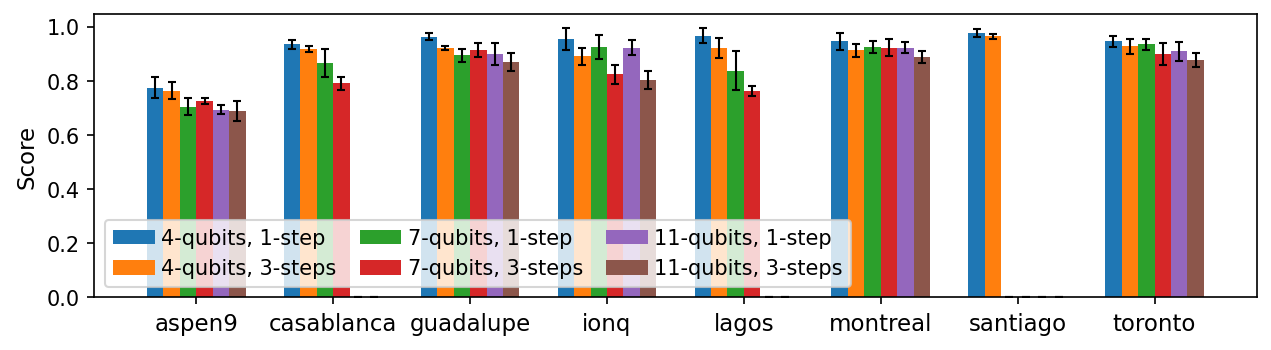

In [203]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.12

benchmarks = sorted([idx for idx in df.columns if 'hamsim' in idx], key=lambda n: int(n.split('_')[1].split('q')[0]))
names = get_names(df, benchmarks)
#labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
labels = ['4-qubits, 1-step', '4-qubits, 3-steps', '7-qubits, 1-step', '7-qubits, 3-steps', '11-qubits, 1-step', '11-qubits, 3-steps']
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width*3
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
#ax.set_ylim([0,1.15])
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=3, bbox_to_anchor=(0.0, 0.0, 0.66, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)

#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# QAOA Fermionic SWAP Proxy

['qaoafswap_4qubits', 'qaoafswap_7qubits', 'qaoafswap_11qubits']
['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['4-qubits', '7-qubits', '11-qubits']


Text(0, 0.5, 'Score')

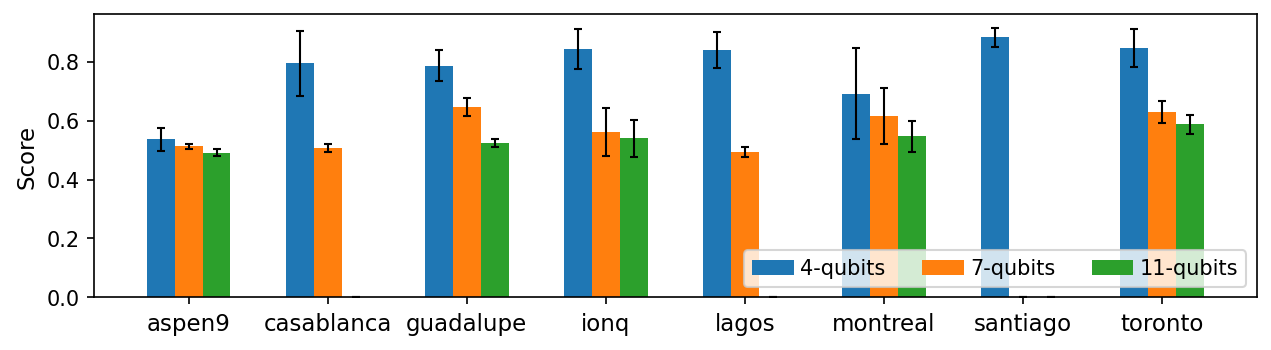

In [204]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.2

benchmarks = sorted([idx for idx in df.columns if 'qaoafswap' in idx], key=lambda n: int(n.split('_')[1].strip('qubits')))
names = get_names(df, benchmarks)
labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width*1.5
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=3, bbox_to_anchor=(0.55, 0., 0.45, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)
#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# QAOA Vanilla Proxy

['qaoavanilla_4qubits', 'qaoavanilla_7qubits', 'qaoavanilla_11qubits']
['aspen9', 'casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['4-qubits', '7-qubits', '11-qubits']


Text(0, 0.5, 'Score')

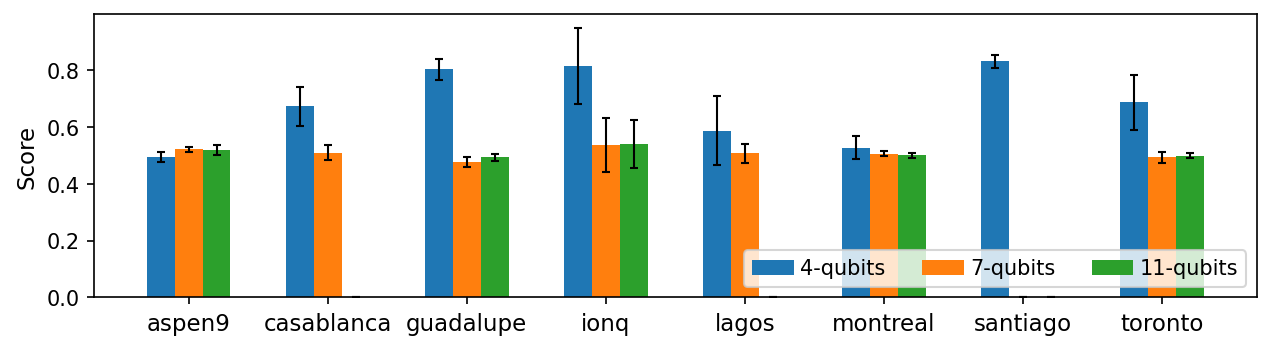

In [205]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.2

benchmarks = sorted([idx for idx in df.columns if 'qaoavanilla' in idx], key=lambda n: int(n.split('_')[1].strip('qubits')))
names = get_names(df, benchmarks)
labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width*1.5
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=3, bbox_to_anchor=(0.55, 0., 0.45, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)
#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# VQE Proxy

['vqe_4qubits1layers', 'vqe_4qubits2layers', 'vqe_7qubits1layers', 'vqe_7qubits2layers']
['casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['4-qubits, 1-layer', '4-qubits, 2-layers', '7-qubits, 1-layer', '7-qubits, 2-layers']


Text(0, 0.5, 'Score')

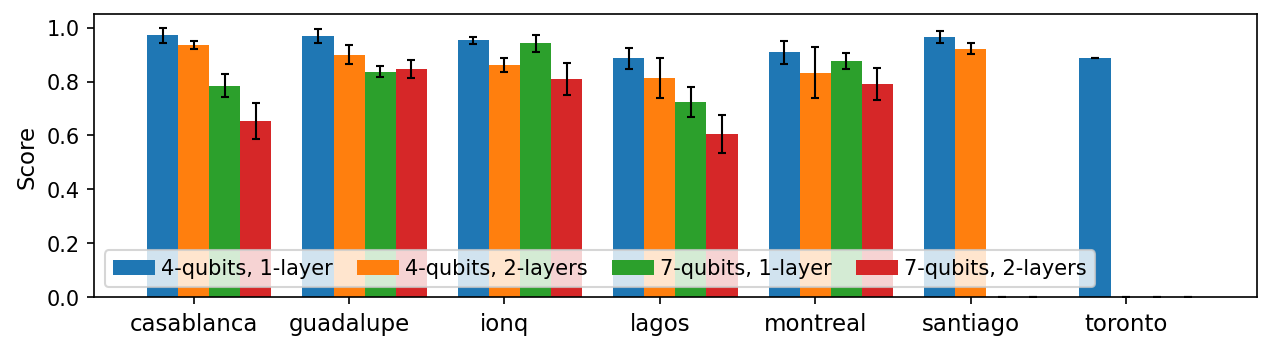

In [206]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.2

benchmarks = sorted([idx for idx in df.columns if 'vqe' in idx], key=lambda n: int(n.split('_')[1].split('q')[0]))
names = get_names(df, benchmarks)
#labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
labels = ['4-qubits, 1-layer', '4-qubits, 2-layers', '7-qubits, 1-layer', '7-qubits, 2-layers']
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width*1.5
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=4, bbox_to_anchor=(0.0, 0., 0.87, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)
#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# Bit Code

['bitcode_3qubits2rounds', 'bitcode_3qubits3rounds', 'bitcode_5qubits2rounds', 'bitcode_5qubits3rounds']
['casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['3-data qubits, 2-rounds', '3-data qubits, 3-rounds', '5-data qubits, 2-rounds', '5-data qubits, 3-rounds']


Text(0, 0.5, 'Score')

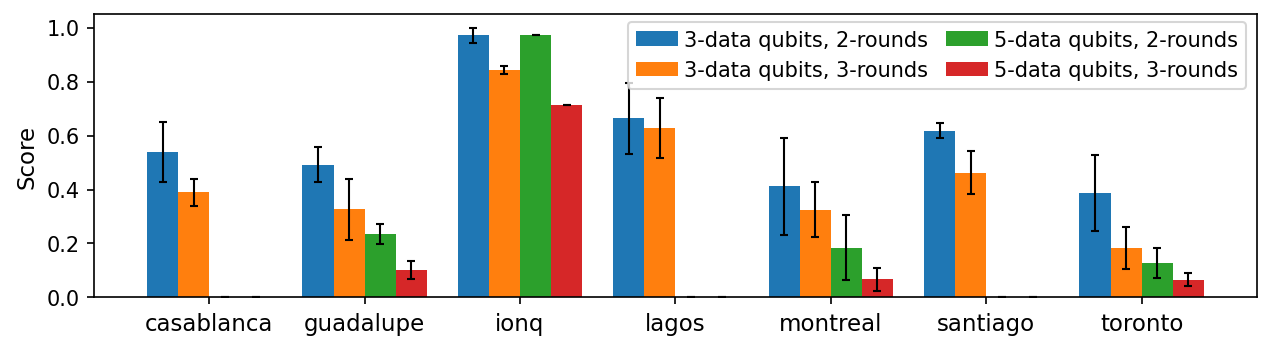

In [213]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.2

benchmarks = sorted([idx for idx in df.columns if 'bitcode' in idx], key=lambda n: int(n.split('_')[1].split('q')[0]))
names = get_names(df, benchmarks)
#labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
labels = ['3-data qubits, 2-rounds', '3-data qubits, 3-rounds', '5-data qubits, 2-rounds', '5-data qubits, 3-rounds']
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width*2
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
#ax.set_ylim([0,0.9])
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=2, bbox_to_anchor=(0.45, 0.7, 0.55, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)
#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# Phase Code

['phasecode_3qubits2rounds', 'phasecode_3qubits3rounds', 'phasecode_5qubits2rounds', 'phasecode_5qubits3rounds']
['casablanca', 'guadalupe', 'ionq', 'lagos', 'montreal', 'santiago', 'toronto']
['3-data qubits, 2-rounds', '3-data qubits, 3-rounds', '5-data qubits, 2-rounds', '5-data qubits, 3-rounds']


Text(0, 0.5, 'Score')

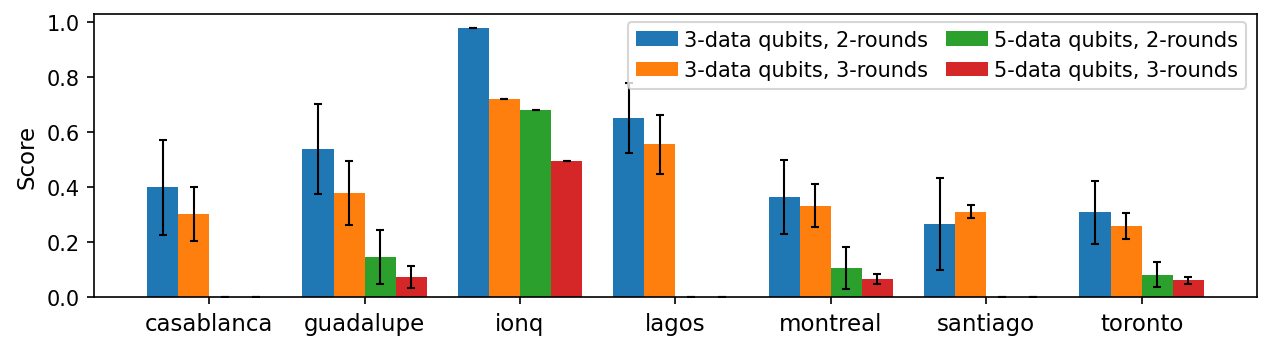

In [212]:
fig, ax = plt.subplots(dpi=150, figsize=[10,2.5])

#names = ['AQT-4Q', 'IBM-\nCasablanca-7Q', 'IBM-Paris-27Q', 'Rigetti-\nAspen-32Q', 'IonQ-11Q']
width = 0.2

benchmarks = sorted([idx for idx in df.columns if 'phasecode' in idx], key=lambda n: int(n.split('_')[1].split('q')[0]))
names = get_names(df, benchmarks)
#labels = ['-q'.join(n.split('_')[1].split('q')) for n in benchmarks]
labels = ['3-data qubits, 2-rounds', '3-data qubits, 3-rounds', '5-data qubits, 2-rounds', '5-data qubits, 3-rounds']
print(benchmarks)
print(names)
print(labels)

for i, bmark in enumerate(benchmarks):
    column_df = df.loc[:, bmark]
    means = [column_df.loc[qpu][0] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    stddevs = [column_df.loc[qpu][1] if isinstance(column_df.loc[qpu], tuple) else 0 for qpu in names]
    lower_errs = [std if (m - std) > 0 else m for std, m in zip(stddevs, means)]
    upper_errs = [std if (m + std) < 1 else (1-m) for std, m in zip(stddevs, means)]

    xvals = np.arange(len(names)) - width*2
    x = [val + width*i for val in xvals]

    ax.bar(x, means, yerr=[lower_errs, upper_errs], width=width, label=labels[i], align='edge',
           capsize=2, error_kw={'lw':1})
    

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, fontsize=11)
#ax.set_ylim([0,0.9])
ax.legend(fontsize=10, loc='lower right', mode='expand', ncol=2, bbox_to_anchor=(0.45, 0.7, 0.55, 0.5), handletextpad=0.3)
ax.set_ylabel('Score', fontsize=11)
#plt.tight_layout()
#fig.savefig('figures/qaoa_scores_revised.pdf')

# Correlate features with performance

In [225]:
score_df = df

In [222]:
feature_df = pd.read_pickle('feature_dataframe.pickle')
feature_df.head()

,Communication,Liveness,Parallelism,Measurement,Entanglement,Depth,qubits,entangling-gates,regular-depth
bitcode_3qubits2rounds,0.4,0.622222,0.181818,0.818182,0.727273,0.75,5,8,9
bitcode_3qubits3rounds,0.4,0.633333,0.2,0.733333,0.8,0.666667,5,12,12
bitcode_5qubits2rounds,0.222222,0.461538,0.380952,0.809524,0.761905,0.625,9,16,13
bitcode_5qubits3rounds,0.222222,0.513889,0.448276,0.724138,0.827586,0.5,9,24,16
ghz_11qubits,0.181818,0.242424,0,1.0,0.909091,1.0,11,10,12


In [226]:
correlation_df = pd.DataFrame(data=None, index=score_df.index, columns=feature_df.columns)
correlation_df.head()

,Communication,Liveness,Parallelism,Measurement,Entanglement,Depth,qubits,entangling-gates,regular-depth
aspen9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
casablanca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guadalupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ionq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lagos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
for feature in correlation_df.columns:
    print(feature)
    
    application_features = feature_df.loc[:, feature]
    
    for device in correlation_df.index:
        scores = score_df.loc[device, :]

        x, y = [], []
        for benchmark in scores.index:
            if isinstance(scores.loc[benchmark], tuple):
                x.append(application_features.loc[benchmark])
                y.append(scores.loc[benchmark][0])

        X = np.array(x)[:, np.newaxis]
        Y = np.array(y)
        model = LinearRegression().fit(X, Y)
        correlation = model.score(X, Y)
        print(f'\t{device}: {correlation:.3f}')
        
        correlation_df.loc[device, feature] = correlation

Communication
	aspen9: 0.006
	casablanca: 0.001
	guadalupe: 0.036
	ionq: 0.003
	lagos: 0.028
	montreal: 0.001
	santiago: 0.122
	toronto: 0.053
Liveness
	aspen9: 0.081
	casablanca: 0.003
	guadalupe: 0.013
	ionq: 0.006
	lagos: 0.015
	montreal: 0.001
	santiago: 0.009
	toronto: 0.000
Parallelism
	aspen9: 0.332
	casablanca: 0.001
	guadalupe: 0.005
	ionq: 0.116
	lagos: 0.001
	montreal: 0.002
	santiago: 0.018
	toronto: 0.011
Measurement
	aspen9: 0.539
	casablanca: 0.026
	guadalupe: 0.097
	ionq: 0.057
	lagos: 0.002
	montreal: 0.116
	santiago: 0.038
	toronto: 0.131
Entanglement
	aspen9: 0.854
	casablanca: 0.145
	guadalupe: 0.150
	ionq: 0.050
	lagos: 0.146
	montreal: 0.168
	santiago: 0.013
	toronto: 0.096
Depth
	aspen9: 0.018
	casablanca: 0.259
	guadalupe: 0.239
	ionq: 0.443
	lagos: 0.248
	montreal: 0.170
	santiago: 0.229
	toronto: 0.160
qubits
	aspen9: 0.051
	casablanca: 0.076
	guadalupe: 0.151
	ionq: 0.262
	lagos: 0.197
	montreal: 0.059
	santiago: 0.614
	toronto: 0.090
entangling-gates
	aspen9

In [236]:
correlation_df

,Communication,Liveness,Parallelism,Measurement,Entanglement,Depth,qubits,entangling-gates,regular-depth
aspen9,0.005709,0.080554,0.331645,0.538897,0.853921,0.018353,0.050808,0.002469,0.079077
casablanca,0.000856,0.003234,0.000594,0.026372,0.144848,0.258686,0.076252,0.075285,0.011443
guadalupe,0.036358,0.012887,0.005492,0.09657,0.149629,0.23854,0.151319,0.026751,0.001195
ionq,0.003418,0.00577,0.116493,0.056808,0.049831,0.442559,0.261542,0.393879,0.30277
lagos,0.028474,0.01488,0.001161,0.001683,0.14566,0.247812,0.196743,0.148254,0.029395
montreal,0.001435,0.000606,0.00161,0.116089,0.168169,0.169909,0.058629,0.002766,0.009305
santiago,0.121912,0.008704,0.018158,0.038453,0.013382,0.228762,0.61423,0.02237,0.000432
toronto,0.053088,0.000033,0.010546,0.131185,0.095881,0.15988,0.090179,0.000064,0.015367
